<center><h2>19AIE205 : Python for Machine Learning</h2></center>

<center><h3>DNA Sequence Classification Using Machine Learning Algorithms</h3></center>

### TEAM 5:
#### ANUVARSHINI.S.P(CB.EN.U4AIE19011)
#### JAYASHREE.O (CB.EN.U4AIE19031)
#### MEGHNA BRIJESH MENON(CB.EN.U4AIE19043)
#### P RAMA SAILAJA((CB.EN.U4AIE19045)

# Scikit learn - Tool to Perform Machine Mearning 


### Scikit-learn offers an extensive range of built-in algorithms that make the most of data science projects.


#### 1. Classification

#### 2. Regression

#### 3. Clustering

#### 4. Dimensionality reduction

#### 5. Model selection

#### 6. Preprocessing

### DNA SEQUENCING USING MACHINE LEARNING 
#### PROBLEM

In [1]:
import sys                          #System-specific parameters and functions
                                    #This module provides access to some variables used or maintained by the interpreter and 
                                    #to functions that interact strongly with the interpreter.
import numpy as np                  #NumPy is an open-source numerical Python library.
import sklearn                      #Scikit-learn is a free machine learning library for Python.
import pandas as pd                 #Pandas is a python library that is used for data analysis,

##### IMPORTING DATA SET

In [2]:
# import the uci Molecular Biology (Promoter Gene Sequences) Data Set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
#Urllib module is the URL handling module for python. It is used to fetch URLs (Uniform Resource Locators).
#It uses the urlopen function and is able to fetch URLs using a variety of different protocols.
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)
#Reads a comma-separated values (csv) file into DataFrame.
print(data.iloc[0])
#.iloc[] is primarily integer position based (from 0 to length-1 of the axis)
#Access group of rows and columns by integer position(s).

Class                                                       +
id                                                        S10
Sequence    \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
Name: 0, dtype: object


##### PRE-PROCESSING DATA SET


In [3]:
# Build the  Dataset by creating a custom Pandas DataFrame
# Each column in a DataFrame is called a Series. 
classes = data.loc[:, 'Class']
#Set value for rows matching callable condition
# all the values are set to value under class in the data. that is "+ or -"  [binary class]
print(classes[:5])

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object


In [4]:
# generate list of DNA sequences
sequences = list(data.loc[:, 'Sequence'])
#list with all the values under sequence in data  
dataset = {} # dictionary 
# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    #The enumerate() method adds counter to an iterable and returns it (the enumerate object),
    #it takes parameter >>iterable - a sequence, an iterator, or objects that supports iteration
    
    nucleotides = list(seq) 
    # list 
    nucleotides = [x for x in nucleotides if x != '\t'] 
    # split into nucleotides, remove tab characters
    
    # append class assignment
    nucleotides.append(classes[i])
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset[0]) #printing the first coln

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [5]:
# turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)
#DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
#these are like spread sheet or SQL
#syntax-DataFrame([data, index, columns, dtype, copy])
print(dframe)


   0   1   2   3   4   5   6   7   8   9    ... 96  97  98  99  100 101 102  \
0    t   t   g   a   t   a   c   t   c   t  ...   c   c   t   a   g   c   g   
1    a   g   t   a   c   g   a   t   g   t  ...   c   g   a   g   a   c   t   
2    c   c   a   t   g   g   g   t   a   t  ...   g   c   t   a   g   t   a   
3    t   t   c   t   a   g   g   c   c   t  ...   a   t   g   g   a   c   t   
4    a   a   t   g   t   g   g   t   t   a  ...   g   a   a   g   g   a   t   
5    g   t   a   t   a   c   g   a   t   a  ...   t   g   c   g   c   a   c   
6    c   c   g   g   a   a   g   c   a   a  ...   a   g   c   t   a   t   t   
7    a   c   a   a   t   a   t   a   a   t  ...   g   a   g   g   t   g   c   
8    a   t   g   t   t   g   g   a   t   t  ...   a   c   a   t   g   g   a   
9    t   g   a   g   a   g   g   a   a   t  ...   c   t   a   a   t   c   a   
10   a   a   a   t   a   a   a   a   t   c  ...   c   t   c   c   c   c   c   
11   c   c   c   g   c   g   g   c   a   c  ...   c 

In [6]:
# transpose the DataFrame
df = dframe.transpose()
print(df)

    0  1  2  3  4  5  6  7  8  9   ... 48 49 50 51 52 53 54 55 56 57
0    t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t  +
1    t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a  +
2    g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g  +
3    a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c  +
4    t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g  +
..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
101  c  c  t  c  a  a  t  g  g  c  ...  g  a  a  c  t  a  t  a  t  -
102  g  t  a  t  t  c  t  c  a  a  ...  t  c  a  a  c  a  t  t  g  -
103  c  g  c  g  a  c  t  a  c  g  ...  a  a  g  g  c  t  t  c  c  -
104  c  t  c  g  t  c  c  t  c  a  ...  a  g  g  a  g  g  a  a  c  -
105  t  a  a  c  a  t  t  a  a  t  ...  t  c  a  a  g  a  a  c  t  -

[106 rows x 58 columns]


In [7]:
# last coln contains the information of the class 
df.rename(columns = {57: 'Class'}, inplace = True) 
# renaming the '57' (header of the last coln) as 'class'
print(df.iloc[:5])# printing first 5 rows

   0  1  2  3  4  5  6  7  8  9  ... 48 49 50 51 52 53 54 55 56 Class
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t     +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a     +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g     +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c     +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g     +

[5 rows x 58 columns]


##### ANALYSING THE DATA

In [8]:
df.describe() #Generates descriptive statistics.

#data returned
#count- total number of data values, that is the number of rows
#unique- total number of unique values it the column
#top-most frequently occured value in the column
#freq- frequency of the top.

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,t,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [9]:
# desribe does not tell enough about  information since the attributes are text. 

#recording  value counts for each sequence
series = [] # creating list named series 
for name in df.columns:
    series.append(df[name].value_counts())
    #The append() method appends an element to the end of the list.
    #DataFrame.value_counts:Returns a Series containing counts of unique rows in the DataFrame.
info = pd.DataFrame(series) #series to dataframe
details = info.transpose() #transpose
print(details)
#returning the frequcency of 't','c','a','g' in each column 

      0     1     2     3     4     5     6     7     8     9  ...    48  \
t  38.0  26.0  27.0  26.0  22.0  24.0  30.0  32.0  32.0  28.0  ...  21.0   
c  27.0  22.0  21.0  30.0  19.0  18.0  21.0  20.0  22.0  22.0  ...  36.0   
a  26.0  34.0  30.0  22.0  36.0  42.0  38.0  34.0  33.0  36.0  ...  23.0   
g  15.0  24.0  28.0  28.0  29.0  22.0  17.0  20.0  19.0  20.0  ...  26.0   
+   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
-   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

     49    50    51    52    53    54    55    56  Class  
t  22.0  23.0  33.0  35.0  30.0  23.0  29.0  34.0    NaN  
c  42.0  31.0  32.0  21.0  32.0  29.0  29.0  17.0    NaN  
a  24.0  28.0  27.0  25.0  22.0  26.0  24.0  27.0    NaN  
g  18.0  24.0  14.0  25.0  22.0  28.0  24.0  28.0    NaN  
+   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   53.0  
-   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   53.0  

[6 rows x 58 columns]


### ONE HOT ENCODING:
$\bullet$One hot encoding is a process by which categorical variables are converted into a numerical form that could be provided to ML algorithms to do a better job in prediction.



In [10]:
# Machine learning algorithms does not work for the data in 'String' formats.
#As a result, it is required to switch it to numerical data. 
#This can be accomplished using the pd.get_dummies() function
#pandas.get_dummies() is used for data manipulation. 
#As we saw there are 4 unique values in a column. 
#So we divide the first column itself to 4 columns. In the first column if we 
#see it tells us the places where 'a' is present the first column.
#It assigns 1 if a is present in i th position where 
#i=0 to 105.
#Likewise when we do for all the columns, 
#there were 57 columns previously, and 4 unique values in each column, 
#so the total 
#number of features will become 57*4 which is 228 and similarly ,
#the class had 2 unique values + and - and thus it has two 
#columns of classes

numerical_df = pd.get_dummies(df)
numerical_df
#numerical_df.iloc[:5]

#table representation:
#headers = n_v, where n= 1,2,3.....56 [colums headers in df] and v is the unique values in the each columns in df
# this sparse table contains binary values(0,1). 
#1=if v is present in the position (index) else 0

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
102,0,0,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
103,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
104,0,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1


In [11]:
# last two columns in numerical_df can be made into one as it is unecessary to have two columns.
df = numerical_df.drop(columns=['Class_-'])
#dataframe.drop()- Removes rows or columns with specifiedg label names and corresponding axis, or with specified index or column names.
df.rename(columns = {'Class_+': 'Class'}, inplace = True)# dataframe.rename()-used to alter axes labels.
# the column will contain 0,1 values.1=class with value + and 0 =class with value -
print(df.iloc[:5])

   0_a  0_c  0_g  0_t  1_a  1_c  1_g  1_t  2_a  2_c  ...  54_t  55_a  55_c  \
0    0    0    0    1    1    0    0    0    0    1  ...     0     0     0   
1    0    0    0    1    0    0    1    0    0    1  ...     0     1     0   
2    0    0    1    0    0    0    0    1    1    0  ...     0     0     1   
3    1    0    0    0    1    0    0    0    0    0  ...     0     0     0   
4    0    0    0    1    0    1    0    0    0    0  ...     1     1     0   

   55_g  55_t  56_a  56_c  56_g  56_t  Class  
0     1     0     0     0     0     1      1  
1     0     0     1     0     0     0      1  
2     0     0     0     0     1     0      1  
3     0     1     0     1     0     0      1  
4     0     0     0     0     1     0      1  

[5 rows x 229 columns]


### Classification Report Parameters :
$\bullet$Confusion Matrix : A matrix that can assess the performance of a given classifier. It is of dimension (true class x predicted class)<br>

$\bullet$Classification Accuracy : TP+TN/TP+TN+FP+FN<br>

$\bullet$Misclassification Rate (Error Rate) : FP+FN/TP+TN+FP+FN<br>

$\bullet$Precision : When the model predicted true class and how often it was right -> TP/Total True Predictions = TP/TP+FP<br>

$\bullet$Recall : When the class was actually true , how often did the classifier get it right -> TP/Actual True = TP/TP+FN<br>

$\bullet$F1 score : F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false<br>

$\bullet$Support : The support is the number of samples of the true response that lie in that class.It is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.




##### MODEL SELECTION AND TRAIN SET

In [12]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection
# Create X and Y datasets for training 
#X=features
#y=targets
X = np.array(df.drop(['Class'],axis= 1))
y = np.array(df['Class'])
# define seed for reproducibility
seed = 1
# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)


##### TRAINING AND TESTING THE  CLASSIFICATION ALGORITHM

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["KNN", "Decision Tree", "Random Forest",  "AdaBoost","Naive Bayes" ,
        "SVM Linear", "SVM RBF", "SVM Sigmoid","Gaussian Process","Neural Net"]
#max_features=1
classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    DecisionTreeClassifier(max_depth=5000),
    RandomForestClassifier(max_depth=5000, n_estimators=50),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel = 'linear'), 
    SVC(kernel = 'rbf'),
    SVC(kernel = 'sigmoid'),
    GaussianProcessClassifier(),
    MLPClassifier(alpha=1) 
]
#purpose of zip() is to map the similar index of multiple containers so that they can be used just using as single entity.
models = zip(names, classifiers)
acc_score=[]
for name, classifier in models:
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    print(name)
    acc_score.append(accuracy_score(y_test, predicted))
    print("Accuracy Score:\n",accuracy_score(y_test, predicted)) #tp+tn/tp+tn+fp+fn
    print("Classification report:\n",classification_report(y_test, predicted)) #The classification report visualizer displays the precision, recall, F1, and support scores for the model. 
    print("Confusion Matrix:\n",confusion_matrix(y_test,predicted)) #assess the performance of the classifier (dim=true class x prediction class)
    print()


KNN
Accuracy Score:
 0.7777777777777778
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.62      1.00      0.77        10

    accuracy                           0.78        27
   macro avg       0.81      0.82      0.78        27
weighted avg       0.86      0.78      0.78        27

Confusion Matrix:
 [[11  6]
 [ 0 10]]

Decision Tree
Accuracy Score:
 0.8148148148148148
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.69      0.90      0.78        10

    accuracy                           0.81        27
   macro avg       0.81      0.83      0.81        27
weighted avg       0.84      0.81      0.82        27

Confusion Matrix:
 [[13  4]
 [ 1  9]]

Random Forest
Accuracy Score:
 0.8888888888888888
Classification report:
               precision    recall  f1-score   support

 

C:\Users\jaish\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jaish\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Neural Net
Accuracy Score:
 0.9259259259259259
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27

Confusion Matrix:
 [[15  2]
 [ 0 10]]



C:\Users\jaish\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Naive Bayes Classification 

The fundamental Naive Bayes assumption is that each feature makes an:

$\bullet$independent<br>
$\bullet$equal( None of the attributes is irrelevant and assumed to be contributing equally to the outcome.
)

## BAYES' THOREM
$\rightarrow$Bayes’  Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge.<br> Bayes’ Theorem is stated as:<br>
#### P(class|data) = (P(data|class) * P(class)) / P(data)<br>
Where P(class|data) is the probability of class given the provided data.<br>

### Algorithm<br>
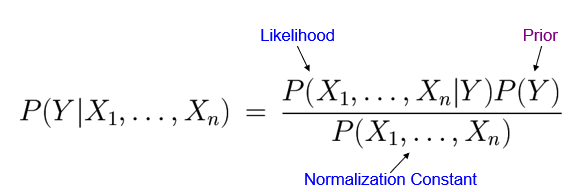
We need to calculate the posterior probability based in the below mentioned parameters :<br>
The model parameters of this algorithm are: likelihood and prior.<br>

$\bullet$Likelihood:The probability of the features given the class label<br>
$\bullet$Prior: The probability of class label given the total number of data<br>
$\bullet$Normalization Constant: The total probability is scaled to a value between 0 and 1 for easier interpretation.<br>

We can reach to a result that:<br>

$ P(Y|X_{i})\ \alpha\ P(Y)\prod_{i=1}^{n}P(X_{i}|Y)$<br>


###  Gaussian Naive Bayes

$\bullet$The method that we discussed above is applicable for discrete data. In case of continuous data, we need to make some assumptions regarding the distribution of values of each feature. The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of Likelihood.

$\bullet$Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution.

$\bullet$This extension of naive Bayes is called Gaussian Naive Bayes. Other functions can be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is the easiest to work with because you only need to estimate the mean and the standard deviation from your training data.In the inbulit Gausian process classifier, the ebf kernel is used as a default kernel as this kernel can do calculations in infinite dimensions.

Mean (µ)∶ This is nothing but calculating the simple average of all the numbers.<br>

<center><h3>$\mu =\frac{1}{n}\sum_{i=1}^{n}X_{i}$</h3></center><br>


Standard Deviation (σ): The standard deviation is a summary measure of the differences of each observation from the mean. It is the square root of the Variance. Variance is the average of the squared differences from the Mean.<br>
<center><h2>$\sigma =\frac{1}{n-1}\sum_{i=1}^{n}(X_{i}-\mu ^{2})$</h2></center><br>


The likelihood of the features is assumed to be Gaussian, hence, conditional probability is given by:
<center><h3>$P(X_{i}|Y)=\frac{1}{\sqrt{2\pi \sigma _{Y}^{2}}}exp(-\frac{(X_{i}-\mu _{Y})^{2}}{2\sigma _{Y}^{2}})$</h3></center><br>


$\rightarrow$ Higher the prediction of the probability of a data belonging to a particular class, it is more likely that the data actually belongs to that class, and vice versa.

### Naive Bayes Code from Scratch using the DNA Sequence Dataset

In [14]:
#first step is separating the class 0 and class 1 
data1=X_train
x0 = []
x1 = []
for i in range(0,len(y_train)):
    if(y_train[i]==0):
        x0.append(X_train[i])
    else:
        x1.append(X_train[i])
#print(x0)
x0 = np.asarray(x0) # array of class 0
print("Shape of x0: ",np.shape(x0))
x1 = np.asarray(x1) # array of class 1
print("Shape of x1: ",np.shape(x1))
row,col = np.shape(x0)
#print(y_train)
#prob0 is the prior probability of class 0
prob0=row/X_train.shape[0]
#prob1 is the prior probability of class 1
prob1=x1.shape[0]/X_train.shape[0]
print("The total probability:",prob0+prob1)


Shape of x0:  (36, 228)
Shape of x1:  (43, 228)
The total probability: 1.0


In [15]:
# now even the feature values are in the binary form.
# In class 0, there are feature values of 0's and 1's. Separating those and calculating its probabities. the size will be 2*228
# which tells that in class 0, the feature values are separated.
# this is the likelihood, P(features|class labels)
fin = []
for i in range(x0.shape[1]):
    ar = x0[:,i] 
    pr0=0
    pr1=0
    inter = []
    for j in ar:
        if(j==0):
            pr0+=1
        else:
            pr1+=1
    inter.append(pr0/x0.shape[0])
    inter.append(pr1/x0.shape[0])
    fin.append(inter)
fin = np.asarray(fin)
np.shape(fin)
fin0=fin.T

In [16]:
#Like wise we calcuate for class 1.
fin = []
for i in range(x1.shape[1]):
    ar = x1[:,i]
    pr0=0
    pr1=0
    inter = []
    for j in ar:
        if(j==0):
            pr0+=1
        else:
            pr1+=1
    inter.append(pr0/x1.shape[0])
    inter.append(pr1/x1.shape[0])
    fin.append(inter)
fin = np.asarray(fin)
np.shape(fin)
fin1=fin.T
#fin1

In [17]:
#finding out the posterior probability
y_fin=[]
for j in range(X_test.shape[0]):
    finp0 = prob0
    finp1 = prob1
    test = X_test[j,:]
    for i in range(len(test)):
        #probability of class 0 given the feature value to be 0
        if(test[i]==0):
            finp0 *= fin0[0,i]
            finp1 *= fin1[0,i]
        else:
        #probability of class 1 given the feature value to be 1
            finp0 *= fin0[1,i]
            finp1 *= fin1[1,i]
    #finp0 consists of class 0 and finp1 consists of class 1
    if(finp0>finp1):
        y_fin.append(0)
    else:
        y_fin.append(1)
y_fin = np.asarray(y_fin)            

In [18]:
print("Predicted: ")
y_fin

Predicted: 


array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0])

In [19]:
print("Actual: ")
y_test

Actual: 


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0], dtype=uint8)

In [20]:
print("Confusion matrix:")
print(confusion_matrix(y_fin,y_test))
print("Accuracy Score: ",accuracy_score(y_fin,y_test))
print("Classification report:\n ",classification_report(y_fin,y_test))

Confusion matrix:
[[15  0]
 [ 2 10]]
Accuracy Score:  0.9259259259259259
Classification report:
                precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.83      0.91        12

    accuracy                           0.93        27
   macro avg       0.94      0.92      0.92        27
weighted avg       0.93      0.93      0.92        27



## KNN:
$\bullet$K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

$\bullet$K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

$\bullet$K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

$\bullet$K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

$\bullet$K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

$\bullet$It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

$\bullet$KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


### APPLICATIONS:
$\bullet$Banking system – KNN can be used to predict if a person is fit for loan approval. Or if he or she has similar traits to a defaulter. 

$\bullet$Calculating credit ratings – KNN can help when calculating an individual’s credit score by comparing it with persons with similar traits. 

$\bullet$Companies like Amazon or Netflix use KNN when recommending books to buy or movies to watch. 

$\bullet$Other areas that use the KNN algorithm include Video Recognition, Image Recognition, Handwriting Detection, and Speech Recognition. 

### KNN Code from Scratch using the DNA Sequence Dataset

In [21]:
from numpy import linalg
from math import sqrt

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance +=np.linalg.norm((row1[i] - row2[i])**2)
    return sqrt(distance)

def knn(train, test_row, k):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
   
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    print("The k instances are: ")
    for i in range(k):
        neighbors.append(distances[i][0])
    return neighbors
k=3
neighbors = knn(X_train, X_test[9], k)
neighbors

The k instances are: 


C:\Users\jaish\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


[array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 0], dtype=uint8),
 array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 

In [22]:
# to check if the actual output and predicted are similar
check_list=[]
for j in neighbors:
    for i in range(len(X_train)):
        comp = j==X_train[i]
        if(comp.all()):
            check_list.append(i)
            break
print("The index of the neighbors are: ",check_list)

The index of the neighbors are:  [47, 29, 32]


In [23]:
for i,j in (zip(check_list,range(k))):
    c = X_train[i]==neighbors[j]
    print(c.all()) # checking if the neighbors are similar
    print(neighbors[j])
    print(X_train[i])
    print("Accuracy Score:\n",accuracy_score(neighbors[j],X_train[i]))
    print("Classification report:\n",classification_report(neighbors[j],X_train[i]))
    print("Confusion Matrix:\n",confusion_matrix(neighbors[j],X_train[i]))

True
[0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 1 0]
[0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 1 0]
Accuracy Score:
 1.0
Classification report:
               precisio

## SVM:

### The Support Vector Machine is a supervised learning algorithm mostly used for classification but it can be used also for regression. The main idea is that based on the labeled data (training data) the algorithm tries to find the optimal hyperplane which can be used to classify new data points.

Usually a learning algorithm tries to learn the most common characteristics (what differentiates one class from another) of a class and the classification is based on those representative characteristics learnt (so classification is based on differences between classes). The SVM works in the other way around. It finds the most similar examples between classes. Those will be the support vectors.

$ \bullet$As an example, lets consider two classes, apples and lemons.
Other algorithms will learn the most evident, most representative characteristics of apples and lemons, like apples are green and rounded while lemons are yellow and have elliptic form.

$ \bullet$In contrast, SVM will search for apples that are very similar to lemons, for example apples which are yellow and have elliptic form. This will be a support vector. The other support vector will be a lemon similar to an apple (green and rounded). So other algorithms learns the differences while SVM learns similarities.

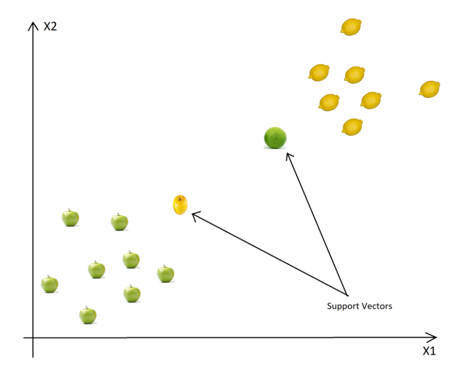

## FINDING THE OPTIMAL HYPERPLANE:
$ \bullet$The best line is the line that has the largest margin.To have optimal solution, we have to maximize the margin.If we capmpare both the diagram below, the first plot has an optimal hyperplane since the margin is large.

$ \bullet$The dimension of the space is defined by the number of attributes of the examples. For the example given below, there are 2 attributes and hence it is in 2D. Sometimes, the dimension can be higher than the attributes for easy classification. 

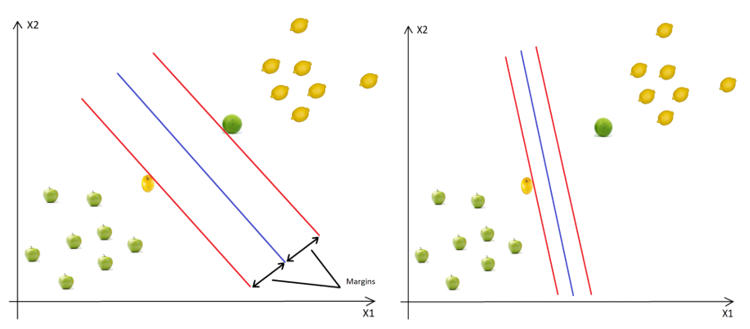

$ \bullet$All in all, support vectors are data points that defines the position and the margin of the hyperplane. We call them “support” vectors, because these are the representative data points of the classes, if we move one of them, the position and/or the margin will change. Moving other data points won’t have effect over the margin or the position of the hyperplane.In 2D, a hyperplane is a line, in 3D it is a plane.<br>

$ \bullet$To make classifications, we don’t need all the training data points (like in the case of KNN), we have to save only the support vectors. 

## BASIC STEPS OF SVM:
1)Select two hyperplanes (in 2D) which separates the data with no points between them<br>

2)maximize their distance (the margin)<br>

3)the average line will be the decision boundary<br>

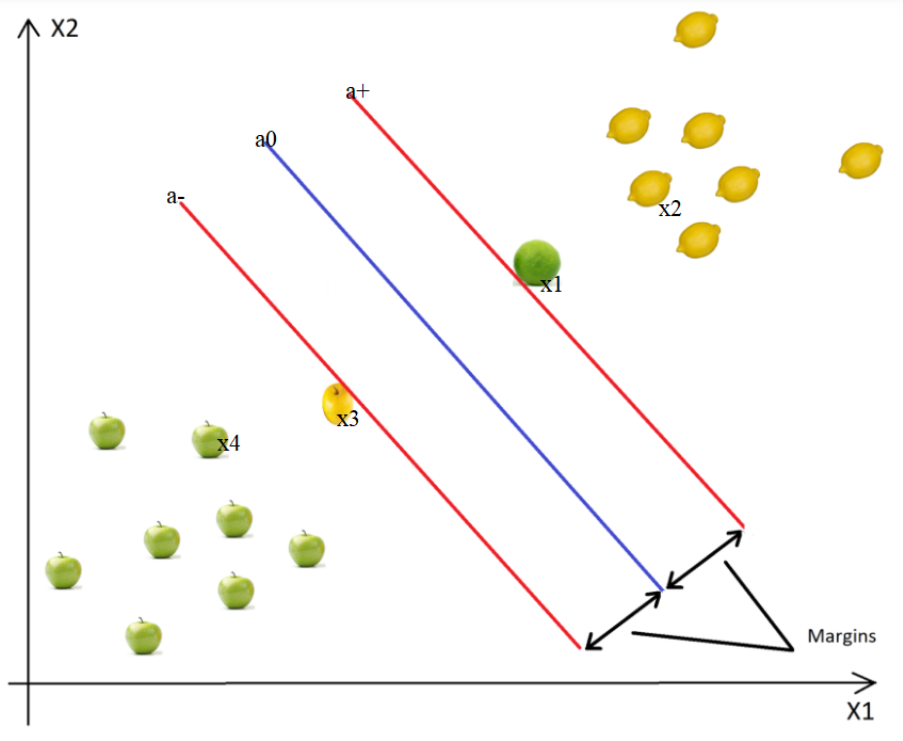

Here, a-,a+, and a0 are the hyperplanes.
<center><h2>$a-= w^{T}x+b=-1$</h2></center><br>
<center><h2>$a0= w^{T}x+b=0$</h2></center><br>
<center><h2>$a+=w^{T}x+b=1$</h2></center><br>

<h1>HARD MARGIN SVM:</h1>
<h3>$if\  y_{i}( w^{T} x_{i}+b) \geq 1   :$</h3>
<h3>$x_{i}\ is\ correctly\ classified.$</h3>
<h3>$else:$</h3>
<h3>$x_{i}\ is\ incorrectly\ classified.$</h3><br>
$\bullet$So we can see that if the points are linearly separable then only our hyperplane is able to distinguish between them and if any outlier is introduced then it is not able to separate them. So these type of SVM is called as "HARD" margin SVM (since we have very strict constraints to correctly classify each and every datapoint).

## SOFT MARGIN SVM:
We basically consider that the data is linearly separable and this might not be the case in real life scenario. We need an update so that our function may skip few outliers and be able to classify almost linearly separable points. For this reason, we introduce a new Slack variable ( ξ ) which is called Xi.
if we introduce ξ it into our previous equation we can rewrite it as
<center><h2>$if\  y_{i}( w^{T} x_{i}+b) \geq 1 -  \xi _{i}   :$</h2></center>

$if \xi _{i}  = 0$<br>
the points can be considered as correctly classified.<br>
else:<br>
$\xi _{i} > 0$ , Incorrectly classified points.
Thus we can think of ξi as an error term associated with Xi(variable). The average error can be given as;<br>
<center><h3>$\frac{1}{n}  \sum_i^n  \xi _{i} $ where i=1,2,3,....,n</h3><br>

Thus, the objective function for Soft Margin SVM is,<br>
    
<center><h3>$\frac{1}{2}  \mid  \mid w \mid  \mid ^{2}+C* \sum_i^n\xi _{i}$</h3></center> 
<center>where C is the regularization Parameter</center>
<center><h3>$s.t\ y_{i}( w^{T} x_{i}+b) \geq 1- \xi _{i},  \xi _{i} \geq 0\ \forall i=1,2,3,...,n$ </h3></center><br>



## SVM for Non-Linear Data Sets
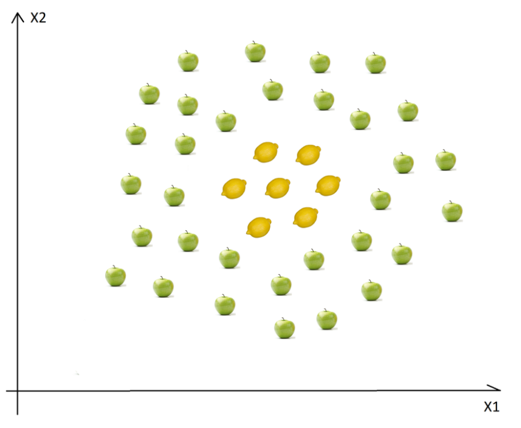

In the above case we can see that the data is non-linear.We cannot find a straight line to separate apples from lemons. This is where the KERNEL TRICK is used.<br>
$ \bullet$The basic idea is that when a data set is inseparable in the current dimensions, add another dimension, maybe that way the data will be separable. Just think about it, the example above is in 2D and it is inseparable, but maybe in 3D there is a gap between the apples and the lemons, maybe there is a level difference. These transformations are called kernels.<br>
$ \bullet$Popular kernels are: <br>
Linear kernel, Polynomial Kernel, Gaussian Kernel, Radial Basis Function (RBF), Sigmoid Kernel.

## PROS:
$\bullet$SVM can be very efficient, because it uses only a subset of the training data, only the support vectors.

$\bullet$Works very well on smaller data sets, on non-linear data sets and high dimensional spaces.

$\bullet$Is very effective in cases where number of dimensions is greater than the number of samples.

$\bullet$It can have high accuracy, sometimes can perform even better than neural networks.

$\bullet$Not very sensitive to overfitting.

### CONS:
$\bullet$Training time is high when we have large data sets.

$\bullet$When the data set has more noise (i.e. target classes are overlapping) SVM doesn’t perform well.

## Popular Use Cases:
$\bullet$Text Classification<br>
$\bullet$Detecting spam<br>
$\bullet$Sentiment analysis<br>
$\bullet$Handwritten digit recognition<br>

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn import model_selection
# Create X and Y datasets for training 
# X=features
# Y=target class
X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])
# define seed for reproducibility
seed = 1
# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)
names = ["SVM Linear", "SVM RBF", "SVM Sigmoid"]
classifiers=[
    SVC(kernel = 'linear',C=1,gamma=auto), # The gamma parameter defines how far the influence 
    #of a single training example reaches. This means
    #that high gamma will consider only points close to the plausible hyperplane and low gamma will consider 
    #points at greater distance.<br>
    SVC(kernel = 'rbf'),
    SVC(kernel = 'sigmoid')]
models = zip(names, classifiers)
for name, classifier in models:
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(X_test)
    print(name)
    print("Accuracy Score:\n",accuracy_score(y_test, predicted))
    print("Classification report:\n",classification_report(y_test, predicted))
    print("Confusion Matrix:\n",confusion_matrix(y_test,predicted))

SVM Linear
Accuracy Score:
 0.9629629629629629
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.91      1.00      0.95        10

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

Confusion Matrix:
 [[16  1]
 [ 0 10]]
SVM RBF
Accuracy Score:
 0.7777777777777778
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.62      1.00      0.77        10

    accuracy                           0.78        27
   macro avg       0.81      0.82      0.78        27
weighted avg       0.86      0.78      0.78        27

Confusion Matrix:
 [[11  6]
 [ 0 10]]
SVM Sigmoid
Accuracy Score:
 0.4444444444444444
Classification report:
               precision    recall  f1-score   support

    

C:\Users\jaish\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jaish\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### SVM Code from Scratch using the DNA Sequence Dataset

In [25]:
import cvxpy as cp
m,n=np.shape(X_train)
W = cp.Variable(n)   # Weight matrix
Psi = cp.Variable(m)  # Slack variable
b = cp.Variable()  # Gamma term
C = 0.01  # Control/Regularization paramters
# Objective function for softmargin svm is 0.5W'W + Ce'Psi
objective = cp.Minimize(0.5 * cp.square(cp.norm(W)) + C * cp.sum(Psi))
# Constraint y(W'x+b)+Psi-1>=0; Psi>=0
constraints = [cp.matmul(y_train, X_train @ W + b)-1 + Psi >= 0, Psi >= 0]
prob = cp.Problem(objective, constraints)
prob.solve()
#print("Optimal value of W:", W.value)
print("Gamma:", b.value)
a=W.value


Gamma: 0.02869095599235562


## Linear Kernel:
$\rightarrow$The Linear kernel is the simplest kernel function. It is given by the inner product <x,y> plus an optional constant c.
<center><h2>$k(x,y)= x^{T}y+c$</h2></center>

In [26]:
linear=[]
for i in range(X_test.shape[0]):
    z=np.matmul(a,X_test[i]) +b.value
    if z>=1:
        linear.append(1)
    else:
        linear.append(0)
print(confusion_matrix(linear,y_test))
print(accuracy_score(linear,y_test))
print(classification_report(linear,y_test))

[[17 10]
 [ 0  0]]
0.6296296296296297
              precision    recall  f1-score   support

           0       1.00      0.63      0.77        27
           1       0.00      0.00      0.00         0

    accuracy                           0.63        27
   macro avg       0.50      0.31      0.39        27
weighted avg       1.00      0.63      0.77        27



C:\Users\jaish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Radial basis Function Kernel:
$\rightarrow$The main motive of the kernel is to do calculations in any d-dimensional space where d>1.RBF kernel is a function whose value depends on the distance from the origin or from some point.
<center><h2>$k(x,y)= e^{- \gamma   \mid  \mid x-y \mid  \mid ^{2} } $</h2></center><br>
where x and y are the data points and $  \mid  \mid x-y \mid  \mid$ gives the Euclidean Distance.<br>

$\rightarrow$The adjustable parameter GAMMA plays a major role in the performance of the kernel, and should be carefully tuned to the problem at hand. If overestimated, the exponential will behave almost linearly and the higher-dimensional projection will start to lose its non-linear power. In the other hand, if underestimated, the function will lack regularization and the decision boundary will be highly sensitive to noise in training data.

In [27]:
rbf=[]
for i in range(len(y_test)):
    q=euclidean_distance(a,X_test[i])
    expo=np.exp(-b.value*(q**2))
   
    if expo>=1:
        rbf.append(1)
    else:
        rbf.append(0)
#print(rbf)
print(confusion_matrix(y_test,rbf))
print(accuracy_score(y_test,rbf))
print(classification_report(y_test,rbf))

[[17  0]
 [10  0]]
0.6296296296296297
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        17
           1       0.00      0.00      0.00        10

    accuracy                           0.63        27
   macro avg       0.31      0.50      0.39        27
weighted avg       0.40      0.63      0.49        27



C:\Users\jaish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Sigmoid(Hyperbolic Tangent) Kernel:
$\rightarrow$The Hyperbolic Tangent Kernel is also known as the Sigmoid Kernel and as the Multilayer Perceptron (MLP) kernel. The Sigmoid Kernel comes from the Neural Networks field.
<center><h2>$k(x,y)= tanh( \alpha  x^{T}y+c )$</h2></center><br>
This kernel is quite popular for support vector machines due to its origin from neural network theory.There are two adjustable parameters in the sigmoid kernel, the slope alpha and the intercept constant c. A common value for alpha is 1/N, where N is the data dimension.

In [28]:
sigmoid=[]
for i in range(len(y_test)):
    alpha=1/len(y_test)
    arr=np.tanh(alpha*np.matmul(a,X_test[i])+b.value)
   
    if arr>=1:
        sigmoid.append(1)
    else:
        sigmoid.append(0)
#print(sigmoid)
print(confusion_matrix(y_test,sigmoid))
print(accuracy_score(y_test,sigmoid))
print(classification_report(y_test,sigmoid))

[[17  0]
 [10  0]]
0.6296296296296297
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        17
           1       0.00      0.00      0.00        10

    accuracy                           0.63        27
   macro avg       0.31      0.50      0.39        27
weighted avg       0.40      0.63      0.49        27



## DECISION TREE

# 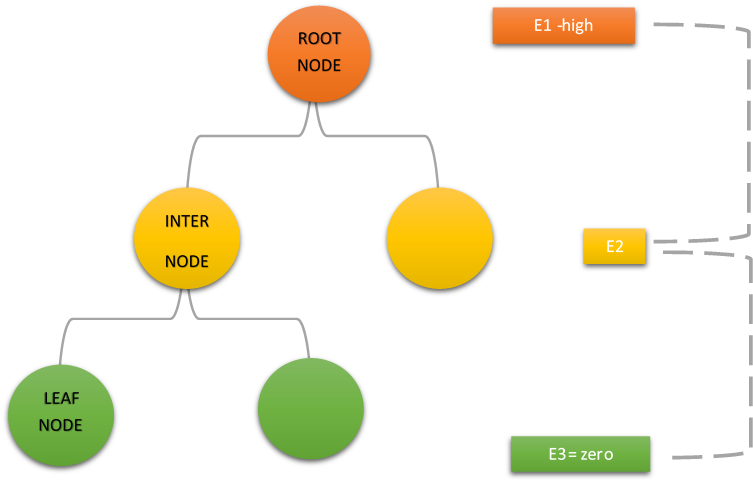



Entropy: it is the measure of randomness/unpredictability in a dataset  

Where P(x=k) is the probability that a target feature takes a specific value, k.
	


Information gain: it is the measure of decrease in entropy after the data split. 
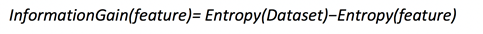
A feature with a highest information gain is chosen for a split.




Gini Index: It is calculated by subtracting the sum of squared probabilities of each class from one. It favours larger partitions and easy to implement whereas information gain favours smaller partitions with distinct values.
 
A feature with a lower Gini index is chosen for a split.

In [29]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report

In [30]:
# last two columns in numerical_df can be made into one as it is unecessary to have two columns.
df = numerical_df.drop(columns=['Class_-'])
#dataframe.drop()- Removes rows or columns with specifiedg label names and corresponding axis, or with specified index or column names.
df.rename(columns = {'Class_+': 'Class'}, inplace = True)# dataframe.rename()-used to alter axes labels.
# the column will contain 0,1 values.1=class with value + and 0 =class with value -
print(df.iloc[:5])

class_name=["+","-"]
# Create X and Y datasets for training 
# X=features
# Y=targets
X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])
# define seed for reproducibility
seed = 1
# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=seed)
# 25% of the data is used for testing the algorithm and remaining for training the algorithm
print(X)
print(y)

   0_a  0_c  0_g  0_t  1_a  1_c  1_g  1_t  2_a  2_c  ...  54_t  55_a  55_c  \
0    0    0    0    1    1    0    0    0    0    1  ...     0     0     0   
1    0    0    0    1    0    0    1    0    0    1  ...     0     1     0   
2    0    0    1    0    0    0    0    1    1    0  ...     0     0     1   
3    1    0    0    0    1    0    0    0    0    0  ...     0     0     0   
4    0    0    0    1    0    1    0    0    0    0  ...     1     1     0   

   55_g  55_t  56_a  56_c  56_g  56_t  Class  
0     1     0     0     0     0     1      1  
1     0     0     1     0     0     0      1  
2     0     0     0     0     1     0      1  
3     0     1     0     1     0     0      1  
4     0     0     0     0     1     0      1  

[5 rows x 229 columns]
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 ...
 [0 1 0 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

<Figure size 432x288 with 0 Axes>

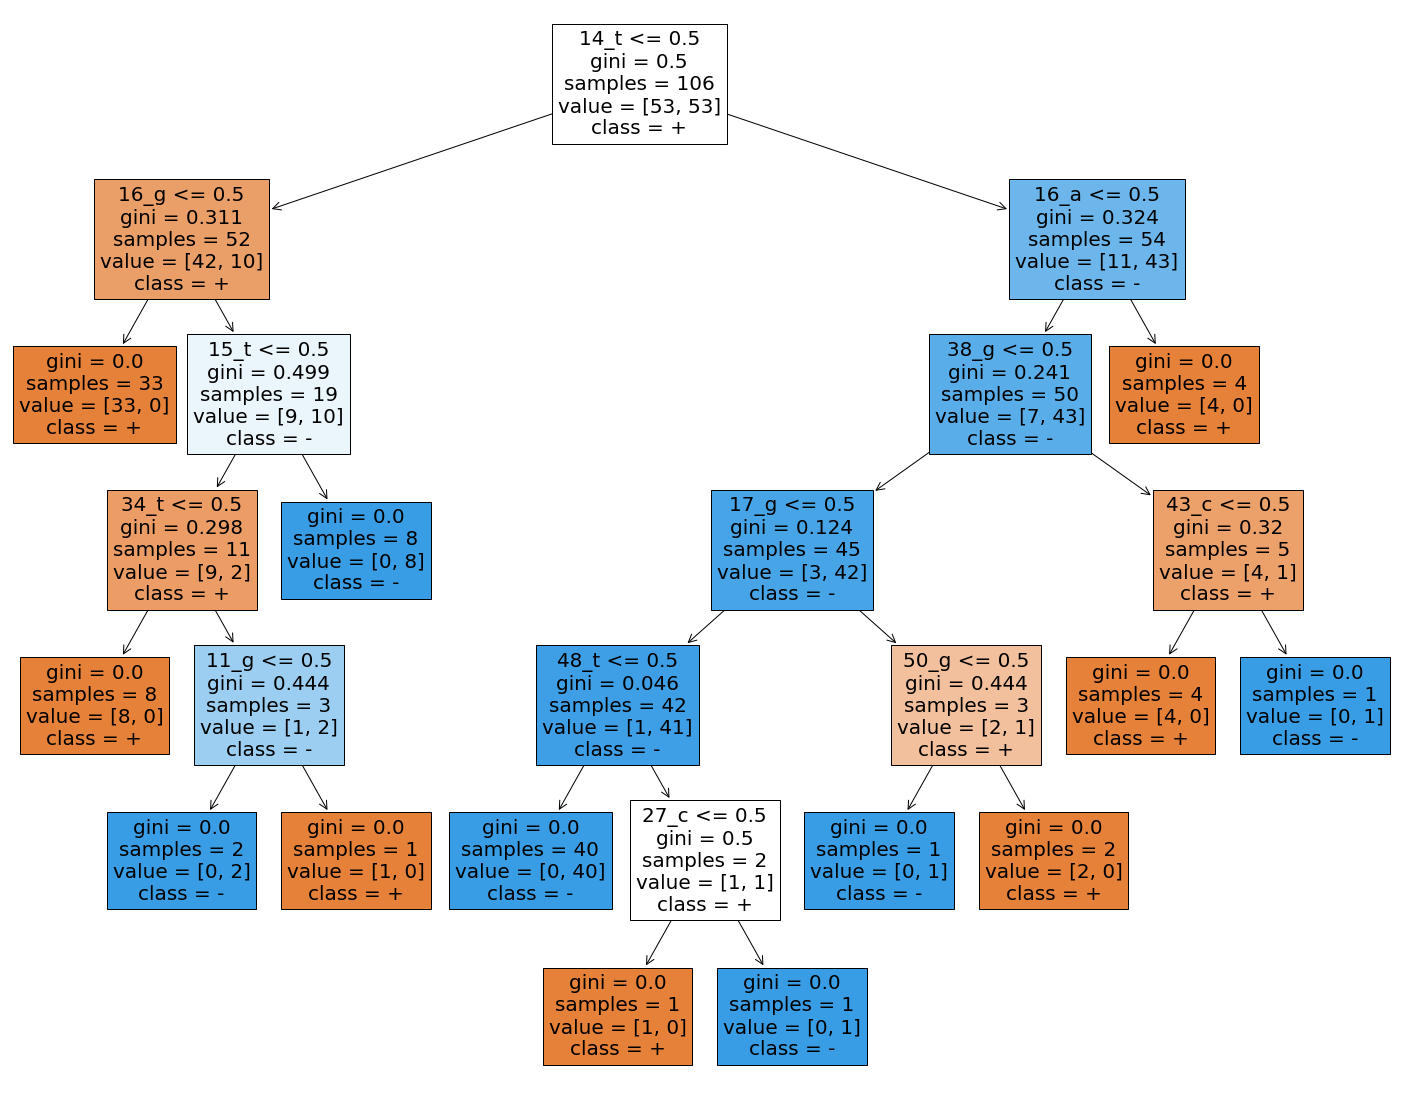

In [31]:
from sklearn.tree import export_graphviz
import pydot
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
'''
   •	Feature names = column header of the df [in our case its 0_a,0_b…….]
   •	Target names = column of data which contains the information of the class

'''
plt.figure()
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=df.columns[:-1],  
                   class_names=class_name,
                   filled=True)


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
predicted=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(predicted)
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score( y_test,y_pred)
print('Accuracy for decision tree = ','%.2f'%(accuracy*100))
print(classification_report(y_test, y_pred))

    Actual  Predicted
0        0        0.0
1        1        1.0
2        0        0.0
3        0        0.0
4        1        0.0
5        0        1.0
6        0        1.0
7        0        0.0
8        1        1.0
9        0        0.0
10       0        0.0
11       1        1.0
12       0        1.0
13       0        0.0
14       1        1.0
15       0        0.0
16       1        1.0
17       0        0.0
18       1        1.0
19       0        0.0
20       0        0.0
21       0        0.0
[[12  3]
 [ 1  6]]
Accuracy for decision tree =  81.82
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.67      0.86      0.75         7

    accuracy                           0.82        22
   macro avg       0.79      0.83      0.80        22
weighted avg       0.84      0.82      0.82        22



## RANDOM FOREST

In [33]:
'''class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini'
, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False,
class_weight=None, ccp_alpha=0.0, max_samples=None)[source]'''

"class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini'\n, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,\nmax_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, \nbootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False,\nclass_weight=None, ccp_alpha=0.0, max_samples=None)[source]"

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5000, random_state=1234,n_estimators=50)
rf.fit(X_train, y_train)   #fit(X, y[, sample_weight]) - Build a forest of trees from the training set (X, y) 
feature_list=df.columns[:-1]


In [35]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: 15_t                 Importance: 0.1
Variable: 14_t                 Importance: 0.06
Variable: 16_g                 Importance: 0.04
Variable: 14_a                 Importance: 0.03
Variable: 5_a                  Importance: 0.02
Variable: 38_g                 Importance: 0.02
Variable: 38_t                 Importance: 0.02
Variable: 39_a                 Importance: 0.02
Variable: 39_g                 Importance: 0.02
Variable: 3_c                  Importance: 0.01
Variable: 5_g                  Importance: 0.01
Variable: 6_a                  Importance: 0.01
Variable: 7_c                  Importance: 0.01
Variable: 7_t                  Importance: 0.01
Variable: 8_c                  Importance: 0.01
Variable: 8_t                  Importance: 0.01
Variable: 9_a                  Importance: 0.01
Variable: 11_a                 Importance: 0.01
Variable: 13_t                 Importance: 0.01
Variable: 15_a                 Importance: 0.01
Variable: 15_g                 Importance

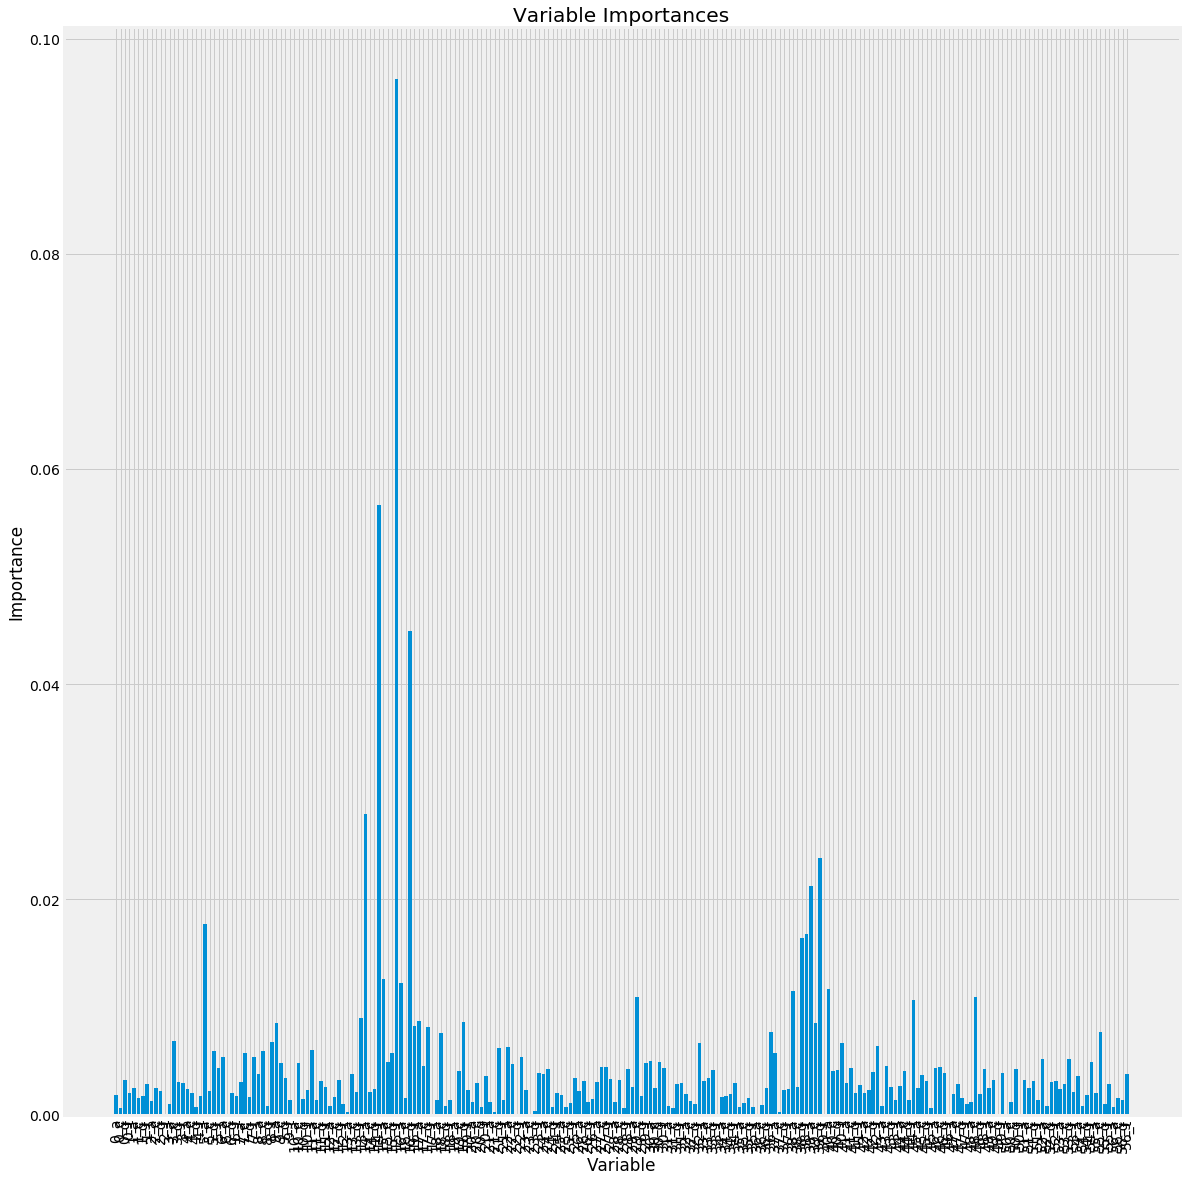

In [36]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize =(20,20)) 
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

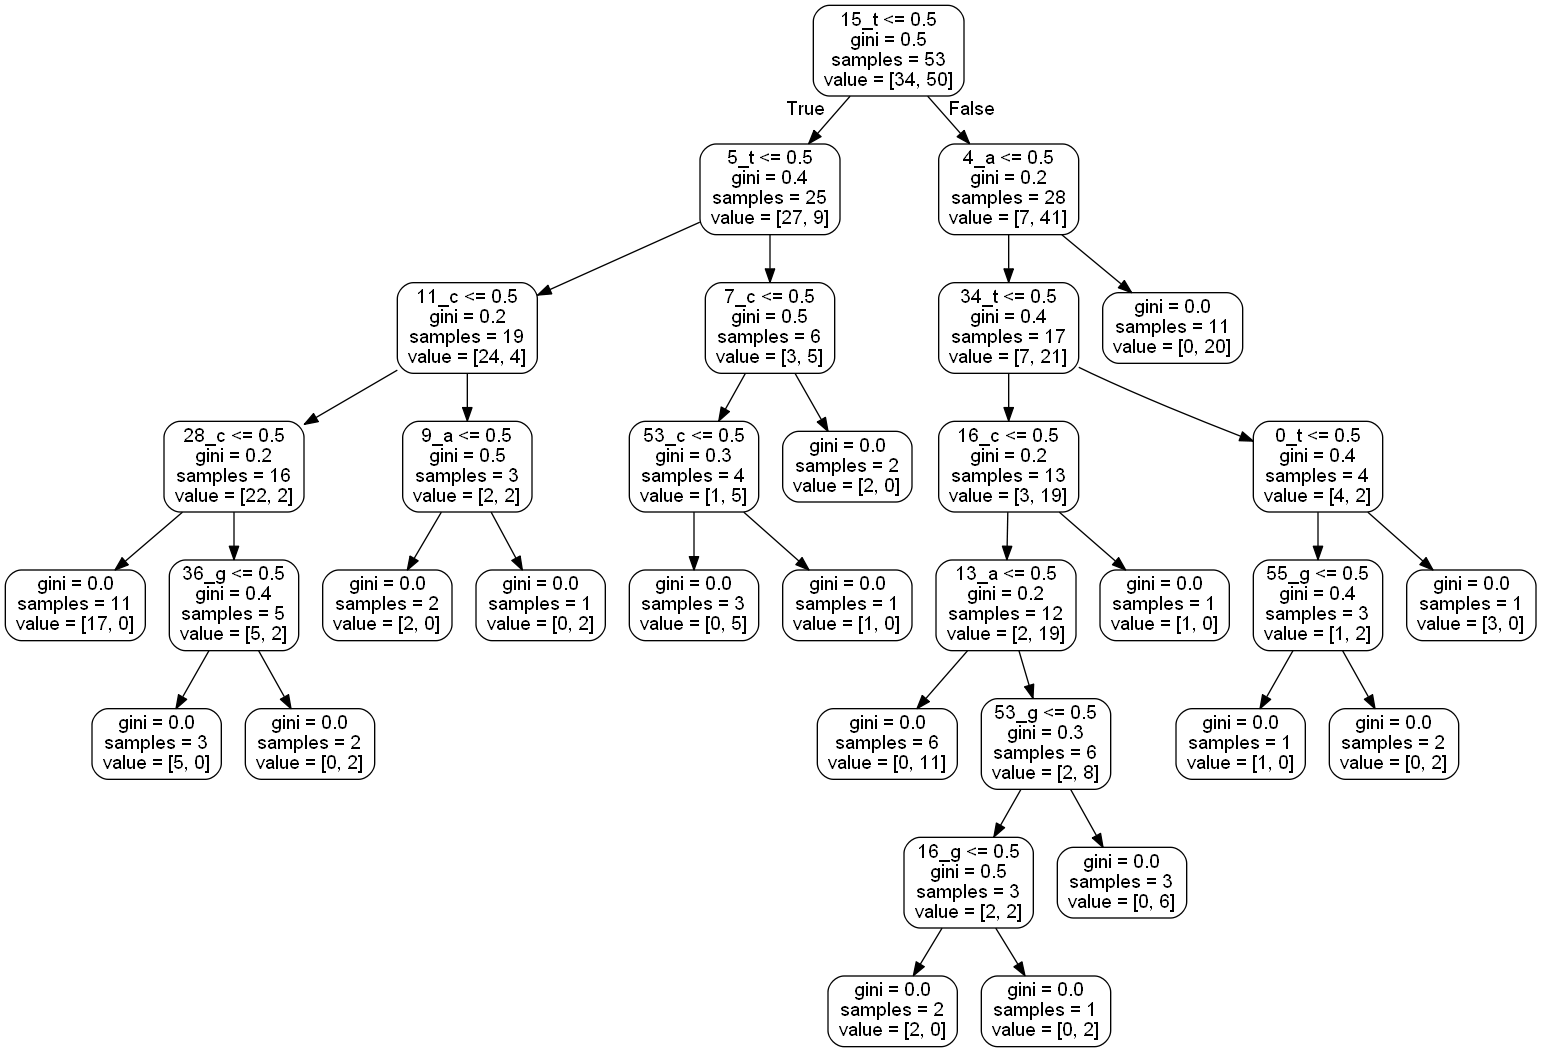

In [37]:
feature_list=df.columns[:-1]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [38]:
# Make predictions and determine the error

y_pred = rf.predict(X_test)
predicted=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(predicted)
#printing confusion matrix
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score( y_test,y_pred)
print('Accuracy for decision tree = ','%.2f'%(accuracy*100))
print(classification_report(y_test, y_pred))

    Actual  Predicted
0        0          0
1        1          1
2        0          0
3        0          0
4        1          1
5        0          0
6        0          1
7        0          1
8        1          1
9        0          0
10       0          0
11       1          1
12       0          0
13       0          0
14       1          1
15       0          0
16       1          1
17       0          0
18       1          1
19       0          0
20       0          0
21       0          0
[[13  2]
 [ 0  7]]
Accuracy for decision tree =  90.91
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.78      1.00      0.88         7

    accuracy                           0.91        22
   macro avg       0.89      0.93      0.90        22
weighted avg       0.93      0.91      0.91        22



## NEURAL NETWORKS

Neural Networks form the base of deep learning, a subfield of machine learning where the algorithms inspired by structure of human brain. Deep learning makes use of artificial neural networks that behave similar to neural networks in our brain. 

Neural Networks are supervised learning algorithms because we(users) define the labels for corresponding data based on domain knowledge.

They take in data, train themselves to recognize the patterns in the data and then predict the outputs for a new set of similar data.


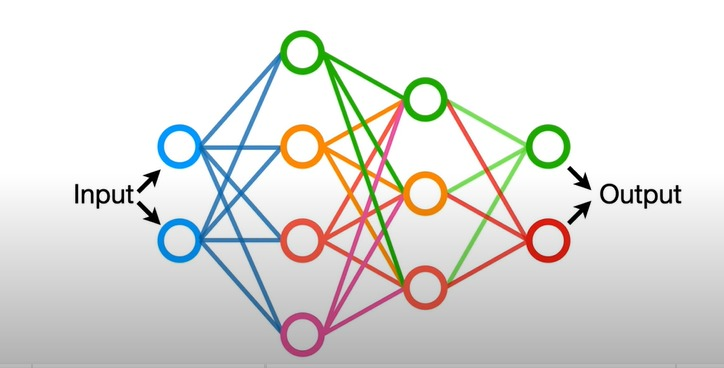

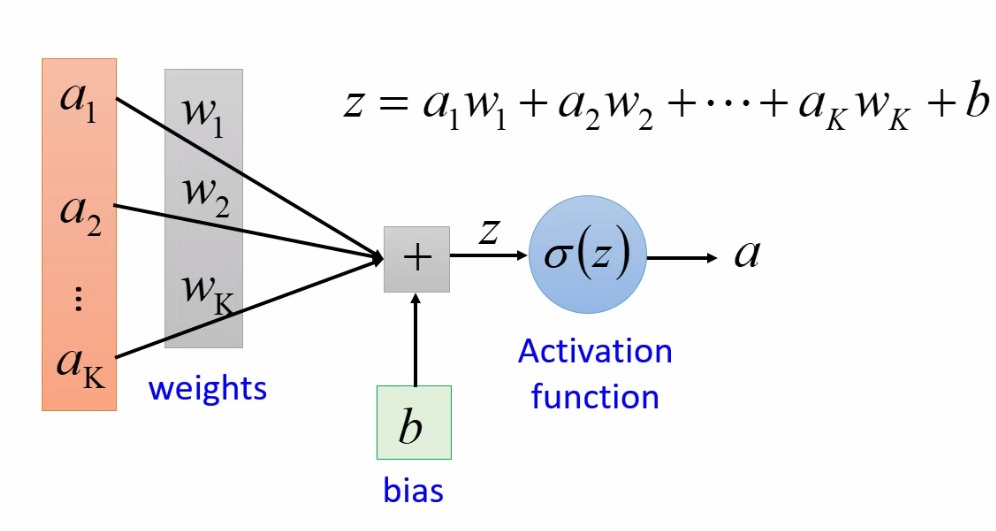

•In neural networks, the input is taken as a vector. the matrix of size k x k is represented as a vector of k^2 elements. 

•Here, in the example, whatever dimension was mentioned initially will be generalized as K.
a1, a2,……… ak    is a vector having K elements. Now, we have an input lying in K dimensional space and we want to map it to an output. 

•We have weights ‘w’ for each of the corresponding input in the same dimension. 

•Hence, the z (neuron) is computed from the sum of dot product between the input and the weights, and bias is added. 

•Bias is just like an intercept added in a linear equation. 

•It is an additional parameter in the Neural Network which is used to adjust the output along with the weighted sum of the inputs to the neuron. 

##### Therefore,  z = a1w1 + a2w2………aKwK + b

##### In vector form, z = w'a + b

•Then the output is passed through an activation function, sigma to get the final output of z.

We want to scale the output either between -1 to +1 or 0 to +1. 
This is why the output is passed through the activation function. This function takes a value as input and outputs another value between 0 and 1. It is non-linear and easy to work with when constructing a neural network model. 

 #### • Neural Network:
 The above example was computation of just one neuron but neural networks have many layers. Each layer may have different number of neurons. Here, we can see, it has L layers. and the first layer of inputs with N elements is the input layer. 

There is no mathematical proof that specifies the number of layers or the number of neurons in each layer. 

#### • Dense connection:
Every neuron in the previous layer is connected to all the neurons in the next layer.
 
#### • Hidden Layer
We have Input layer, output layer which serves as the classifier and in between we have hidden layers. 

Based on input layer and the weights of the input layer L1 is computed and then L1 serves as the input layer to compute L2 with different weights and so on to compute the output layer which is mapped to ‘m’ number of classes. (Forward Propagation)

The layers L1,L2… up to the output layer excluding the input layer and output layer are called hidden layers because these layers are being computed based on the different weights between the layers that are learned from the model.

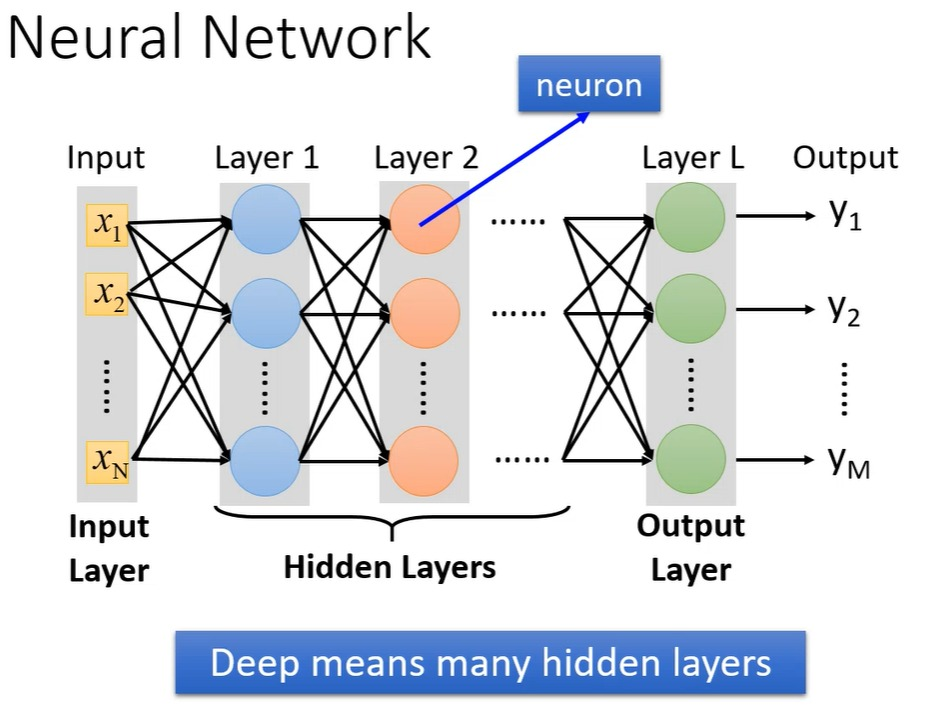

Once the model is trained, the weights are fixed. Depending upon the change in the input, the output also changes and the corresponding class is obtained.

#### Softmax Layer

Many multi-layer neural networks end in a penultimate layer which outputs real-valued scores that are not conveniently scaled and which may be difficult to work with. 

Here the softmax is very useful because it converts the scores to a normalized probability distribution, which can be displayed to a user or used as input to other systems.

For this reason it is usual to append a softmax function as the final layer of the neural network.


## AdaBoost

ADABOOST algorithm is short for Adaptive boosting.

It is a Boosting technique that is used as an Ensemble Method in Machine Learning. 

The learning algorithms which construct a set of classifiers and then classify new data points by taking a choice of their predictions are known as Ensemble methods. 

It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights to incorrectly classified instances. 

First, let us discuss the working of boosting. It makes n number of decision trees during the training period of data.

As the first model is made, the record which is incorrectly classified during the first model is given more priority.

Only these records are sent as input for the second model. The process will go on until we specify a number of base learners we want to create. 

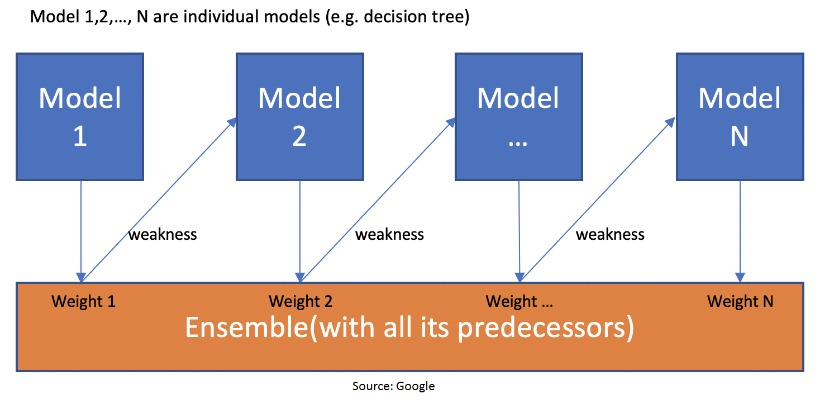

In AdaBoost, the algorithm only makes a node with two leaves, and this is known as Stump.

Stumps are weak learners, and boosting techniques prefer this. The order of stumps is very important in AdaBoost. The error of the first stump influences how the other stump is made.

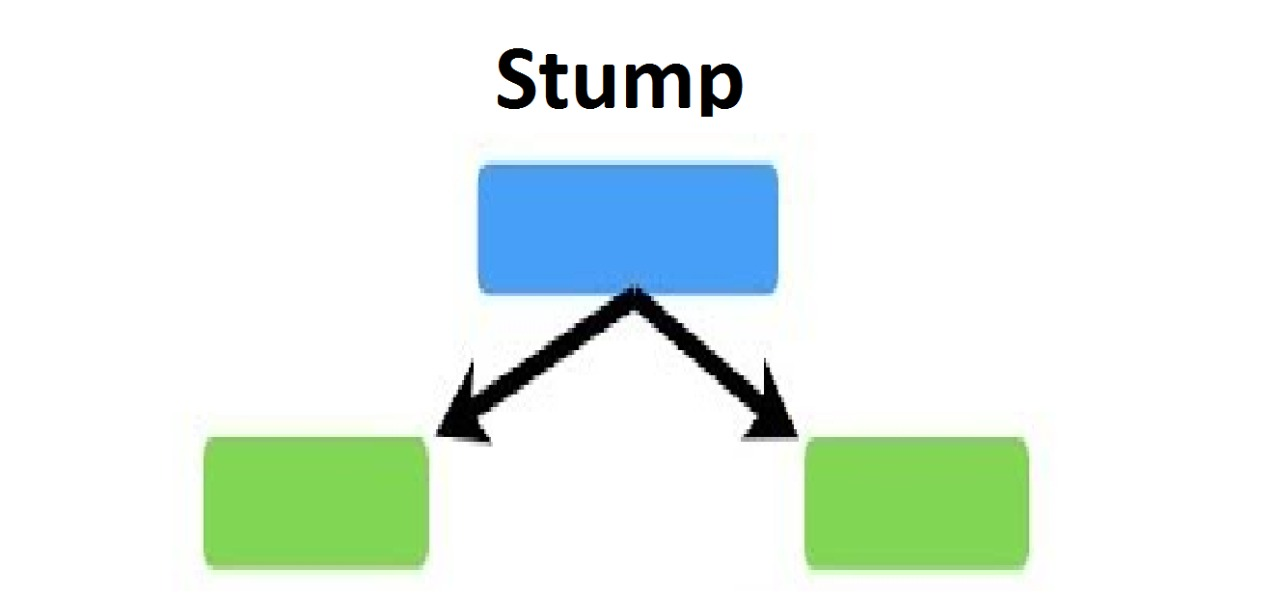

  #### ALGORITHM
#### •STEP 1:
A weak classifier is made on top of the training data based on the weighted samples. Here, the weights of each sample indicate how important it is to be correctly classified. Initially, for the first stump, we give all the samples equal weights

For selecting a base learner, there are two properties, those are, Gini and Entropy. We must calculate Gini or Entropy the same way it is calculated for decision trees

#### •STEP 2:
We create a decision stump for each variable and see how well each stump classifies samples to their target classes. 

The total error is the sum of all the errors in the classified record for sample weights. 

#### •STEP 3: 
To calculate the 
   ##### Performance of the stump = 1/2 * [ Log[(1-TE)/TE]]
   More weight is assigned to the incorrectly classified samples so that they're classified correctly in the next decision stump.

#### •STEP 4:
we will be updating the weights based on the performance of the stump. 
#### For incorrectly classified records the formula is:
##### New Sample Weight = Sample Weight * e^(Performance) 

#### And for correctly classified records, we use the same formula with a negative sign with performance, so that the weight for correctly classified records will reduce compared to the incorrect classified ones. The formula is:  
##### New Sample Weight = Sample Weight * e^- (Performance)

#### •STEP 5:
The total sum of all the weights should be 1. To make the total sum 1, we must divide every updated weight by the total sum of updated weight.

#### •STEP 6:
Now, it’s time to create a new dataset from our previous one.

In the new dataset, the frequency of incorrectly classified records will be more than the correct ones.

While considering these normalized weights, we have to create a new dataset and that dataset is based on normalized weights. 

It will probably select the wrong records for training purposes. That will be the second decision tree/stump. To make a new dataset based on normalized weight, the algorithm will divide it into buckets. 


There is a high probability for the wrong records to get selected several times. 
Based on this new dataset, the algorithm will again create a new stump and it will repeat the same process from step 1 till it sequentially passes through all stumps and finds that there is less error when compared with normalized weight that we had in the initial stage. 

### VISUALISATION AND COMPARISON OF THE DIFFERENT CLASSIFIERS

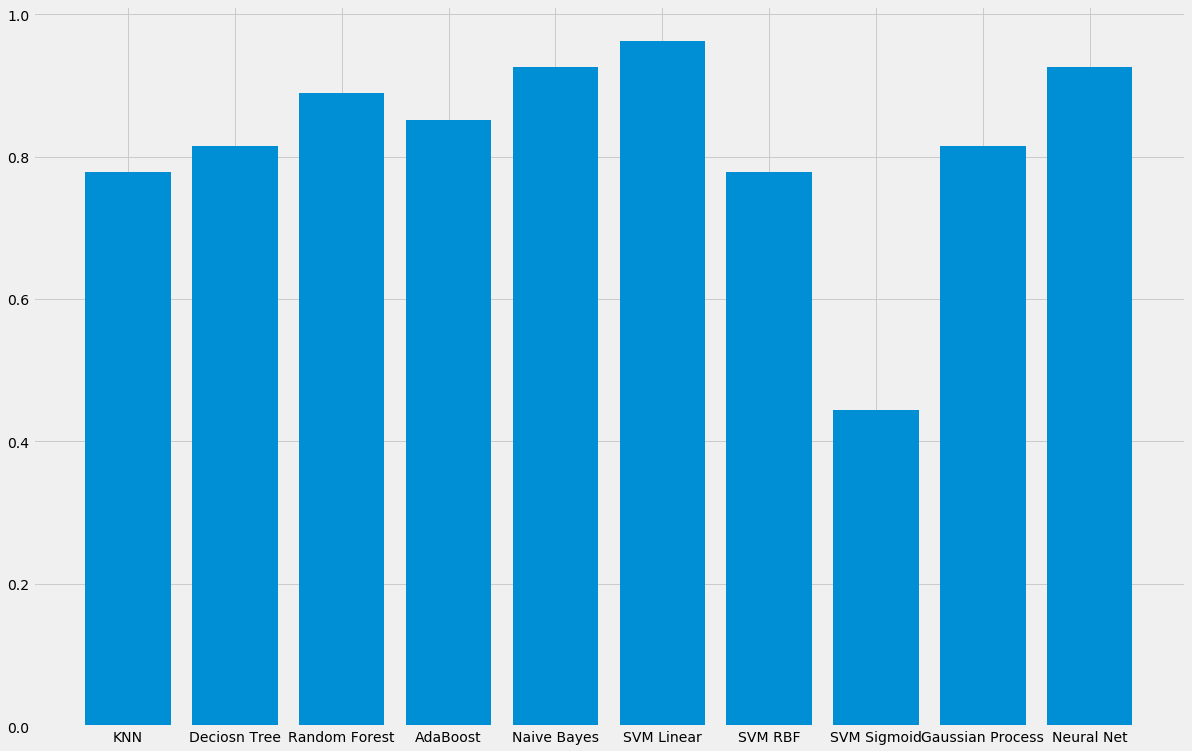

In [39]:
import matplotlib.pyplot as plt
names = ["KNN", "Deciosn Tree", "Random Forest",  "AdaBoost","Naive Bayes" ,
        "SVM Linear", "SVM RBF", "SVM Sigmoid","Gaussian Process","Neural Net"]
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,2,2])
ax.bar(names,acc_score)
plt.show()


### COMPARING SCRATCH AND IN BUILT CODE:

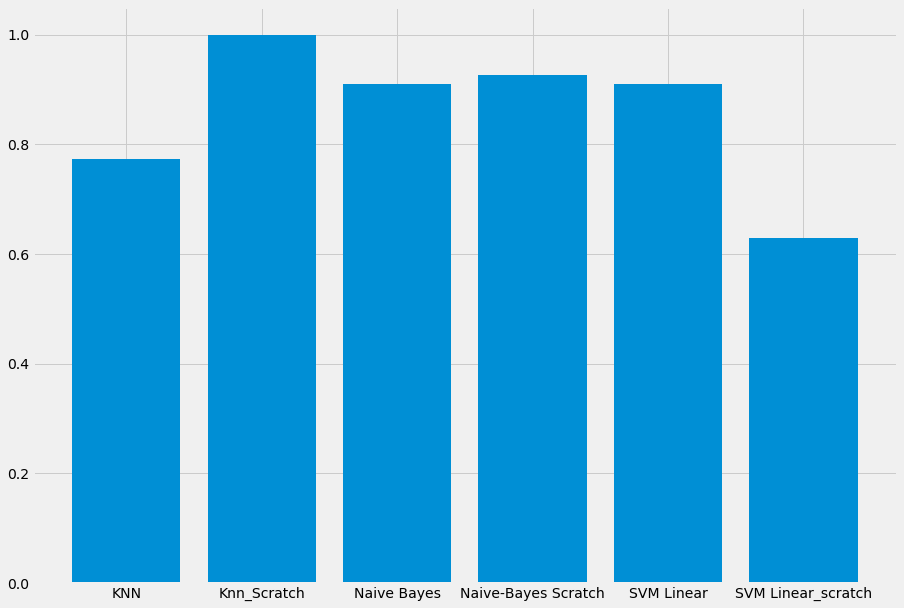

In [40]:
names = ["KNN","Knn_Scratch","Naive Bayes","Naive-Bayes Scratch","SVM Linear","SVM Linear_scratch"]
comp=[0.7727272727272727,1.0,0.9090909090909091,0.9259259259259259, 0.9090909090909091,0.6296296296296297]
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(names,comp) 
plt.show()

Text(0.5, 1.0, 'KNN')

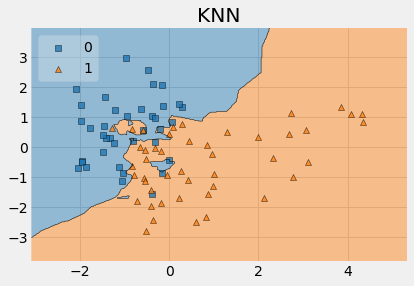

In [41]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt

clf = KNeighborsClassifier(n_neighbors = 3)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('KNN')

Text(0.5, 1.0, 'Decision Tree')

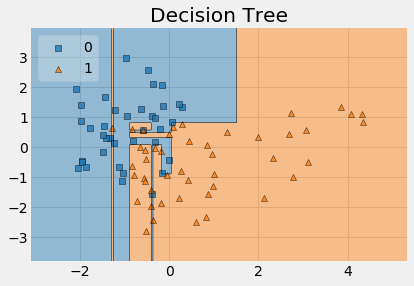

In [42]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf =  DecisionTreeClassifier(max_depth=5000)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('Decision Tree')

Text(0.5, 1.0, 'Random Forest')

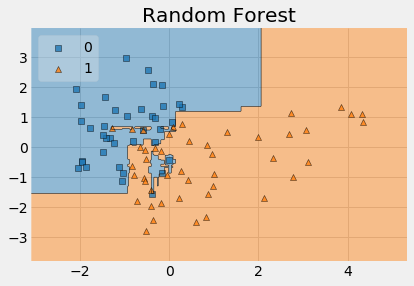

In [43]:
clf = RandomForestClassifier(max_depth=5000, n_estimators=10, max_features=1)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('Random Forest')

C:\Users\jaish\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Neural Networks')

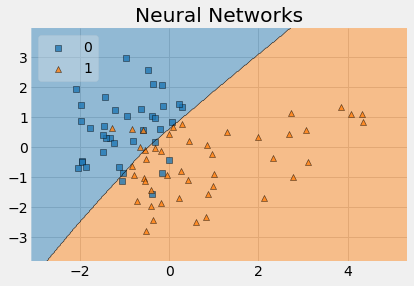

In [44]:
clf = MLPClassifier(alpha=1)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('Neural Networks')
     

Text(0.5, 1.0, 'Naive Bayes')

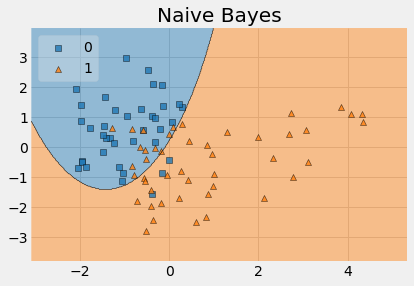

In [45]:
clf = GaussianNB()
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('Naive Bayes')

Text(0.5, 1.0, 'SVM')

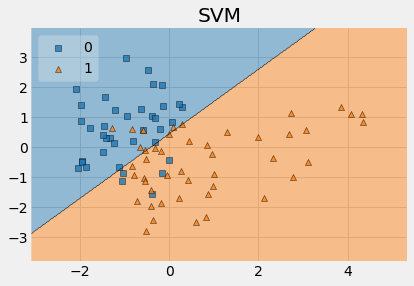

In [46]:
clf =  SVC(kernel = 'linear')
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('SVM')

Text(0.5, 1.0, 'Adaboost')

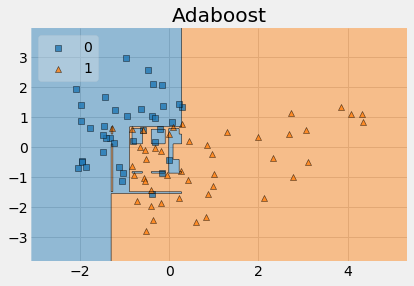

In [47]:
clf =  AdaBoostClassifier()
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)
plt.title('Adaboost')